#### Problem statement
Given File 'startup_funding.csv'

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

##### Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

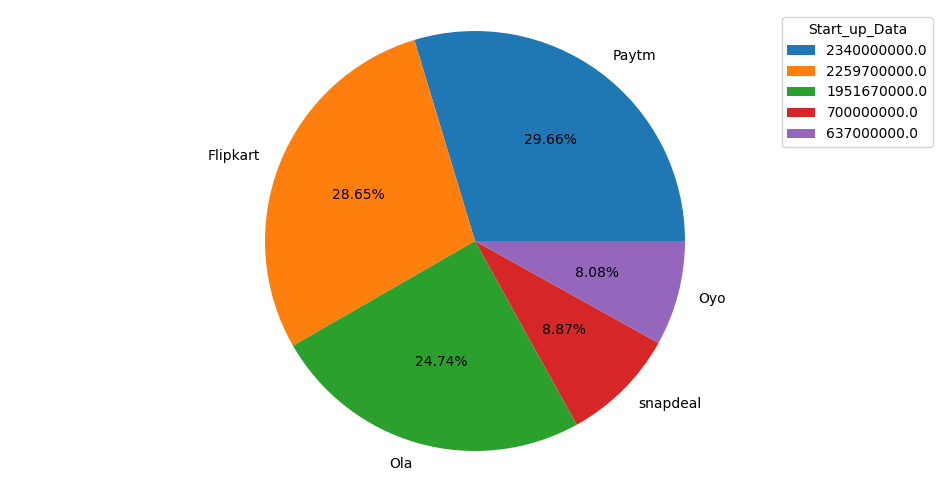

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

file_path  ='startup_funding.csv'
file_obj = pd.read_csv(file_path,encoding='utf-8')
file_obj.head(3)

file_obj.dropna(subset=['StartupName'],inplace=True)

def new_name(startup):
  startup = startup.lower()
  if 'ola' in startup:
    return 'Ola'
  if 'flipkart' in startup:
    return 'Flipkart'
  if 'oyo' in startup:
    return 'Oyo'
  if 'paytm' in startup:
    return 'Paytm'
  else:
    return startup
file_obj.loc[:,'StartupName']=file_obj['StartupName'].apply(new_name)
file_obj.loc[:,'AmountInUSD']= pd.to_numeric(file_obj['AmountInUSD'].str.replace(',',''),errors='coerce')

start_up = file_obj.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[:5]


plt.figure(figsize=(12,6))
plt.pie(start_up,labels=start_up.index,autopct='%.2f%%')
plt.legend(start_up.values,title ='Start_up_Data',loc ='upper right')
plt.axis('equal')
plt.show()


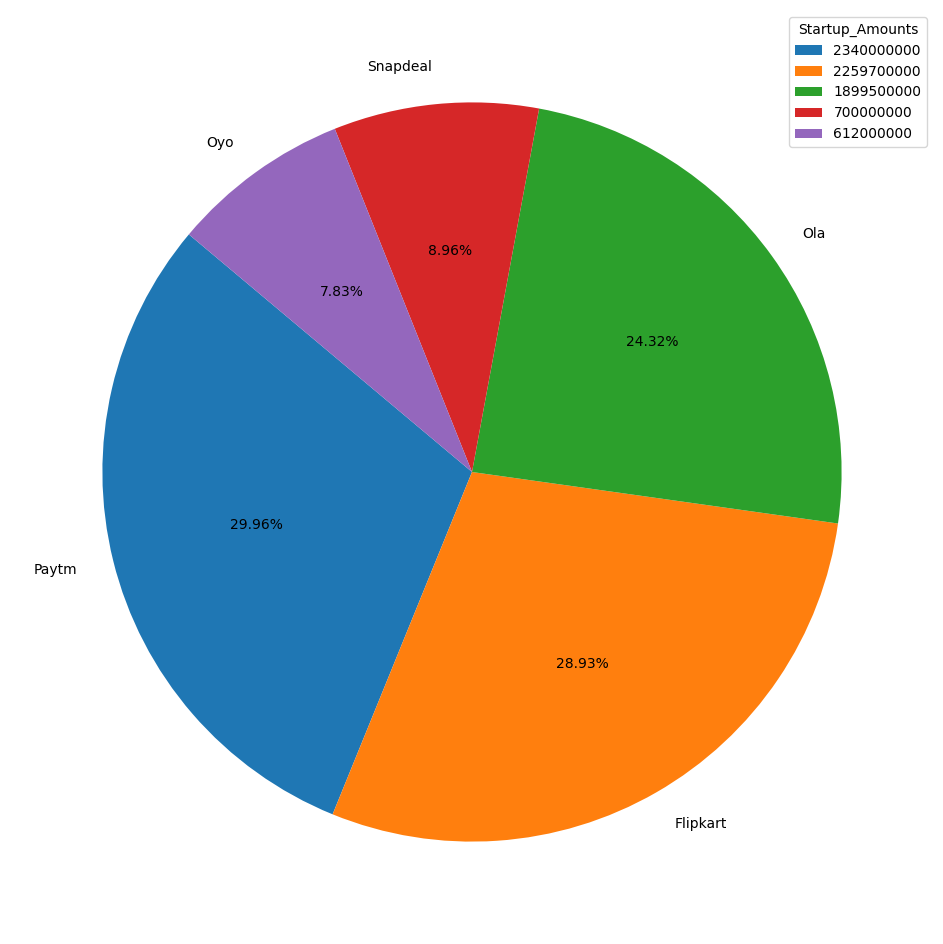

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from fuzzywuzzy import process
df = pd.read_csv('startup_funding.csv')

df=df.copy()
def standardize_startup_name(name):
    if "Ola" in name:
        return "Ola"
    elif "Flipkart" in name:
        return "Flipkart"
    elif "Oyo" in name:
        return "Oyo"
    elif "Paytm" in name:
        return "Paytm"
    else:
        return name 
df['StartupName'] = df['StartupName'].apply(standardize_startup_name)



df.dropna(subset=['StartupName'],inplace=True)
df.dropna(subset=['AmountInUSD'],inplace=True)

df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'].str.replace(',',''),errors='coerce')

creation = pd.concat([df['AmountInUSD'],df['StartupName']],axis=1)
creation =creation.groupby('StartupName')['AmountInUSD'].sum()
creation =creation.sort_values(ascending=False)[:5]
# print(creation)

# creation = creation.head(10)
creation_value =creation.values
creation_index =creation.index
plt.figure(figsize=(21,12))
plt.pie(creation_value,labels=creation_index,startangle=140, autopct='%2.2f%%')
plt.legend(creation_value,title='Startup_Amounts',loc= 'upper right')
plt.show()

for i , (name, count) in enumerate(zip(creation_index,creation_value)):
    print(f'{name}')